# Best Neighborhood in Pittsburgh for Nature
In this notebook we will evalute every neighborhood in Pittsburgh using information about the number of baseball fields, water features, greenways, and pools. After collecting this data for every neighborhood we will apply a consistent metric to obtain the BEST neighborhood in Pittsburgh.


<img src="https://www.cnu.org/sites/default/files/styles/public_square_feature_image/public/Greenway-tioga-fl-arendt1.jpg?itok=MqE-Pg7V"  width="600" height="300">

# Dependencies

We use pandas (of course), matplotlib for plotting, geopandas for our geographical data and shapefiles, and numpy for certain quantitative processing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.ticker as mtick

Here we define some constants to make graphing easier!

In [2]:
FG        = '#ffffff'
BG        = '#000000'
BLACK     = '#000000'
DARK_BLUE = '#141B4D'
DARK_GOLD = '#B58500'
PITT_GOLD = '#FFB81C'
GREEN     = '#22ff22'
PAD       = 5
WPAD      = 5
HPAD      = 5

To begin with we need to obtain all the neighborhoods.

In [3]:
nb = pd.read_csv('Neighborhoods_Files/pgh_neighborhoods.csv')
nb = nb[['name']]
print(nb.head())

                 name
0  Marshall-Shadeland
1    South Side Flats
2   South Side Slopes
3           Arlington
4       Lincoln Place


In [4]:
pools = pd.read_csv('citypools.csv') # load our datasets 
greenways = pd.read_csv('greenways.csv')
features = pd.read_csv('waterfeatures.csv')
fields = pd.read_csv('baseball_fields_2015.csv')

pools = pools['neighborhood'] # select only the neighborhood column for all
greenways = greenways['nhood'] 
features = features['neighborhood']
fields = fields['Neighborhood'] 

print(features.head())


0           Beechview
1    Crawford-Roberts
2    Allegheny Center
3    Allegheny Center
4    Allegheny Center
Name: neighborhood, dtype: object


                     name  pools
1        South Side Flats      2
71          Highland Park      2
90       Mount Washington      1
14            Beltzhoover      1
48            Perry North      1
..                    ...    ...
36                   Hays      0
35        Terrace Village      0
34                Chateau      0
33        Crafton Heights      0
45  Spring Hill-City View      0

[91 rows x 2 columns]


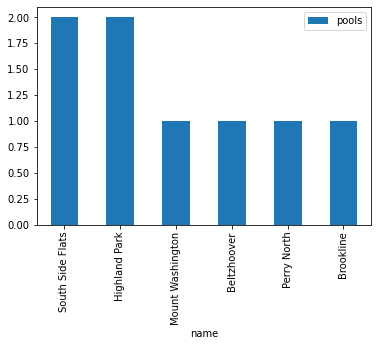

In [5]:
# we want to count how many instances of each neighborhood are in the pool database. 
# This will be essentially be a 'leaderboard' of pools
nb['pools'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in pools:
    inds = nb[nb.name == row]  # get neighborhood index 
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this pool belong to?
        nb.loc[ind,'pools'] += 1 # update accordingly
    
nb = nb.sort_values('pools', ascending=False) # we sort by highest first
print(nb)
nb[:6].plot.bar(x='name')

                     name  pools  greenways
85              Hazelwood      1          1
46            Perry South      0          1
80          South Oakland      0          1
48            Perry North      1          1
62              Brookline      1          1
..                    ...    ...        ...
55   California-Kirkbride      0          0
61      Arlington Heights      0          0
60               West End      0          0
66             Mt. Oliver      0          0
45  Spring Hill-City View      0          0

[91 rows x 3 columns]


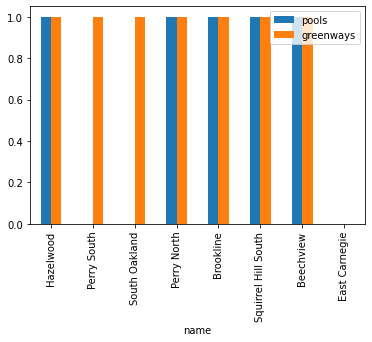

In [6]:

nb['greenways'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in greenways:
    # get neighborhood index 

    #print(row)
    inds = nb[nb.name == row]
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        nb.loc[ind,'greenways'] += 1 # update accordingly
    
nb = nb.sort_values('greenways', ascending=False) # we sort by highest first
print(nb)
nb[:8].plot.bar(x='name')


                   name  pools  greenways  features
86  Squirrel Hill South      1          1        14
71        Highland Park      2          0        12
35      Terrace Village      0          0         8
62            Brookline      1          1         8
83           Bloomfield      1          0         8
..                  ...    ...        ...       ...
3             Arlington      0          0         0
8                Esplen      0          0         0
6             Knoxville      0          0         0
40    Northview Heights      0          0         0
30          South Shore      0          0         0

[91 rows x 4 columns]


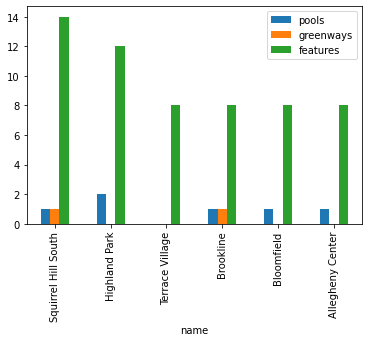

In [7]:

nb['features'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in features:
    # get neighborhood index 
    inds = nb[nb.name == row]
    if(len(inds)):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        #print(len(inds), ind) 
        nb.loc[ind,'features'] += 1 # update accordingly
    
nb = nb.sort_values('features', ascending=False) # we sort by highest first
print(nb)
nb[:6].plot.bar(x='name')


                   name  pools  greenways  features  fields
86  Squirrel Hill South      1          1        14       7
54     Brighton Heights      1          0         6       7
28          Morningside      0          0         5       6
62            Brookline      1          1         8       6
85            Hazelwood      1          1         3       4
90     Mount Washington      1          0         6       4
32            Shadyside      1          0         5       3
7              Sheraden      1          0         3       3


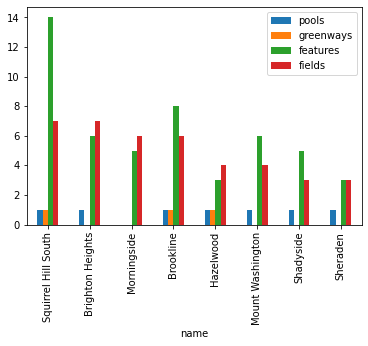

In [8]:
nb['fields'] = pd.Series(0, index=np.arange(len(nb))) # we initialize the leaderboard to all 0's
for row in fields:
    # get neighborhood index 
    
    inds = nb[nb.name == row]
    if len(inds):
        ind = nb[nb.name == row].index[0] # which neighborhood does this feature belong to?
        nb.loc[ind,'fields'] += 1 # update accordingly"""
    
nb = nb.sort_values('fields', ascending=False) # we sort by highest first

nb = nb[:8]
nb.plot.bar(x='name')
print(nb)

In [9]:
print(nb.head())

                   name  pools  greenways  features  fields
86  Squirrel Hill South      1          1        14       7
54     Brighton Heights      1          0         6       7
28          Morningside      0          0         5       6
62            Brookline      1          1         8       6
85            Hazelwood      1          1         3       4


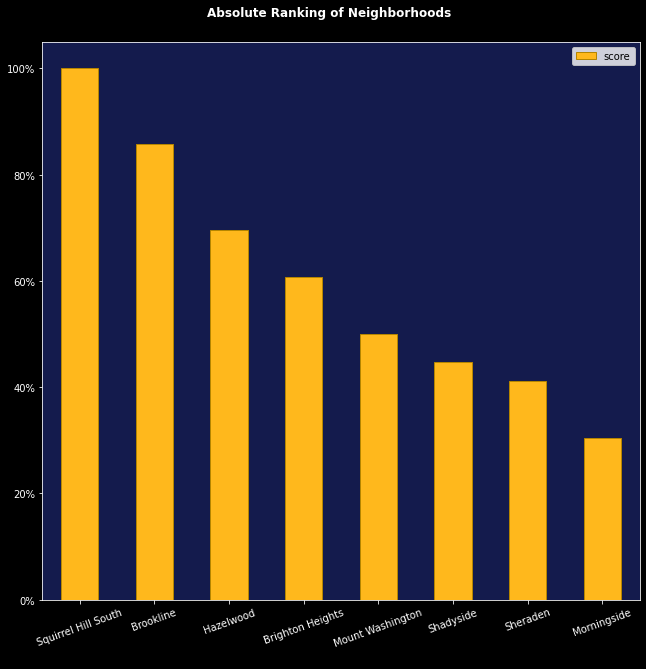

In [12]:
nb['score'] = pd.Series(0, index=np.arange(len(nb))) # we initialize all the scores to 0
for i, row in nb.iterrows():
    nb.loc[i,"score"] = (row.pools + row.greenways + row.features/14 + row.fields/7)/4

nb = nb.sort_values("score", ascending=False) # we sort by highest first

fig, ax = plt.subplots(figsize = (10,10))
ax.set_facecolor(DARK_BLUE)
nbplt = nb[:8]
nbplt.plot.bar(ax=ax, color=PITT_GOLD, edgecolor=DARK_GOLD, x='name', y='score', rot=20)
fig.patch.set_facecolor(BG)
ax.yaxis.set_tick_params(color=FG, labelcolor=FG)
ax.xaxis.set_tick_params(color=FG, labelcolor=FG)
plt.suptitle("Absolute Ranking of Neighborhoods", color=FG, weight='bold')
plt.tight_layout(pad=PAD, w_pad=WPAD, h_pad=HPAD)
for spine in ax.spines.values():
    spine.set_color(FG)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.show()

In [11]:
print("THE HIGHEST SCORING NEIGHBORHOOD IS:", nb['name'].iloc[0])

THE HIGHEST SCORING NEIGHBORHOOD IS: Squirrel Hill South
